# Objective

Find the best discRadius and kernelSize for normxcorr2 pre-processing.

# Images used

71 raw images (cropped, not pre-rescaled) were used to find linear transformation parameters. The same images were also used to find blob_dog() intensity thresholds for images with and without bubbles, using `benchmark_blob_dog_find_thresh_w_normxcorr2.ipynb`.

# Preprocessing

normxcorr2 (from https://github.com/czbiohub/cell-counting-imager/blob/828b8af950beb32ff76548f11764c8915bb9b6d6/cell_counting_imager/normxcorr2.py)

downsampling (from https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.downscale_local_mean)

# Results

discRadius = 3, kernelSize = 140 or 150 yield the best r^2 values and decent slope.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from normxcorr2 import normxcorr2
from skimage.feature import blob_dog
from skimage.io import imread
from skimage import exposure, transform
from scipy.stats import linregress
from matplotlib.lines import Line2D
import warnings, math
warnings.filterwarnings('ignore')

In [2]:
def cross_correlate(im):
    im_normxcorr2 = normxcorr2(kernel, im)
    lr_edge = (im_normxcorr2.shape[0] - im.shape[0])/2
    ud_edge = (im_normxcorr2.shape[1] - im.shape[1])/2
    return im_normxcorr2[int(ud_edge):int(ud_edge*-1), int(ud_edge):int(ud_edge*-1)]

# Test all 71 images

In [4]:
names_raw = pd.read_csv('names.csv', header=None)
names = [x[0][23:-4] for x in names_raw.values]

In [5]:
names_raw = pd.read_csv('names_test.csv', header=None)
names_test = [x[0][14:] for x in names_raw.values]

In [6]:
bubble_image_names = [
    '20200901-193536-2',
    '20200916-192532-4',
    '20201002-131101-4'
]

In [7]:
bubble_image_names_test = [
    '20201217-142717-5',
    '20201217-142717-2',
    '20201217-142717-0',
    '20201216-163816-1',
    '20201216-141203-7',
    '20201216-135719-5',
    '20201216-135719-2'
]

In [8]:
# bubble detection parameters
n = 12
l = 256

# Toggle discRadius

In [12]:
ds = 2 # down-sampling integer factor along each axis
kernelSize = 150

discRadius = 1
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


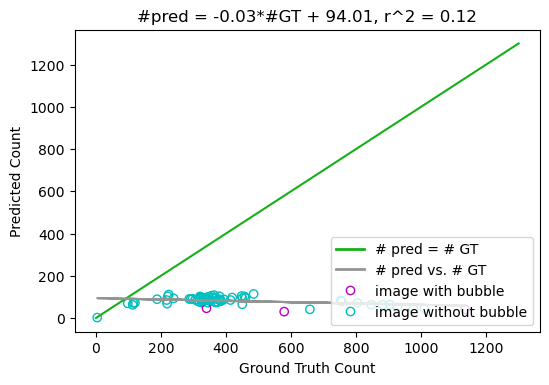

discRadius = 2
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


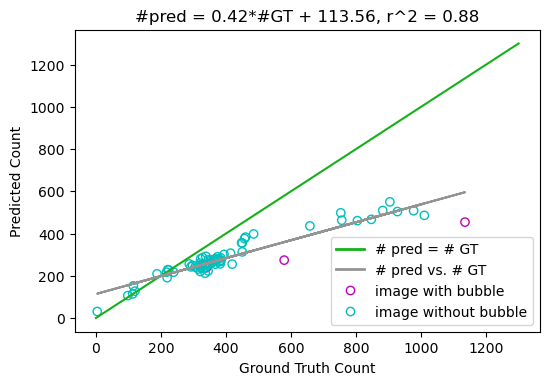

discRadius = 3
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


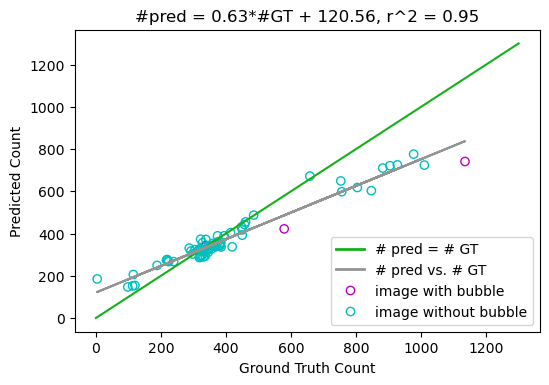

discRadius = 4
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


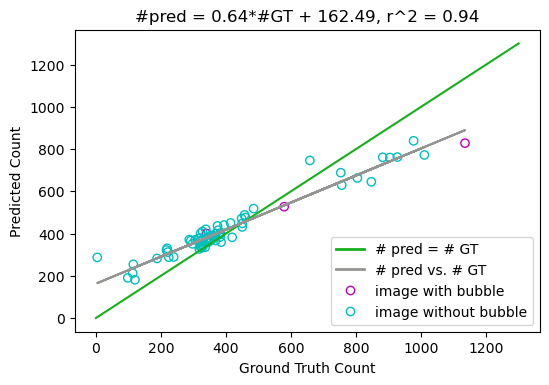

discRadius = 5
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


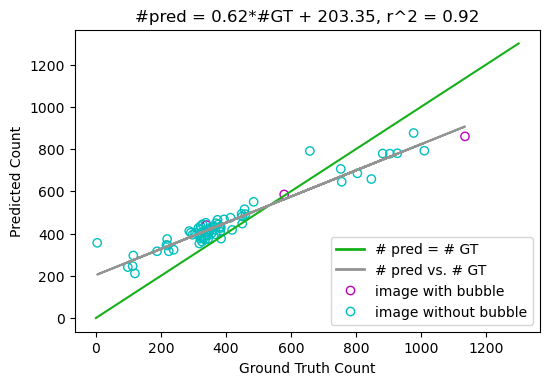

discRadius = 6
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


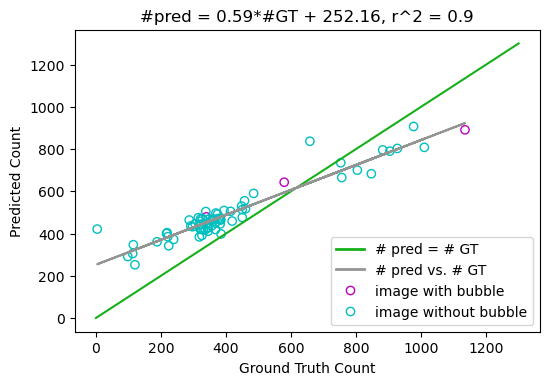

In [13]:
for discRadius in [1, 2, 3, 4, 5, 6]:
    print('discRadius =', discRadius)

    # set up kernel
    kernel = np.zeros((kernelSize, kernelSize), 'uint16')
    kernelCtr = kernelSize/2
    for rr in range(0, kernelSize + 1):
        for cc in range(0, kernelSize + 1):
            if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
                kernel[rr, cc] = 65535
    kernel = transform.downscale_local_mean(kernel, (ds,ds))

    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.1)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='xkcd:green')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='xkcd:gray')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:gray', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

# Toggle kernelSize

In [11]:
ds = 2 # down-sampling integer factor along each axis
discRadius = 3

kernelSize = 140
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


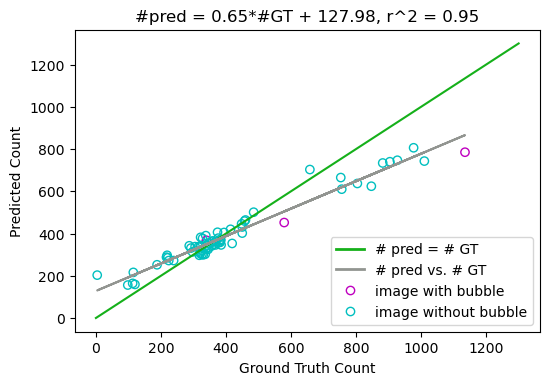

kernelSize = 150
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


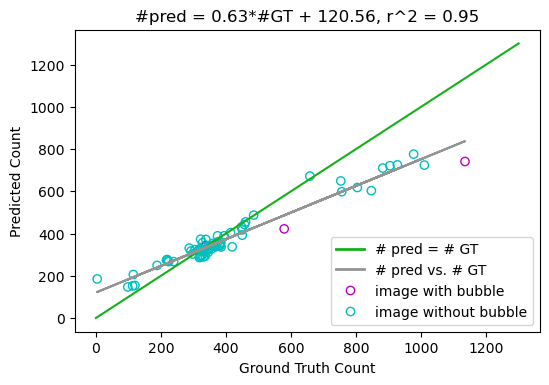

kernelSize = 160
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


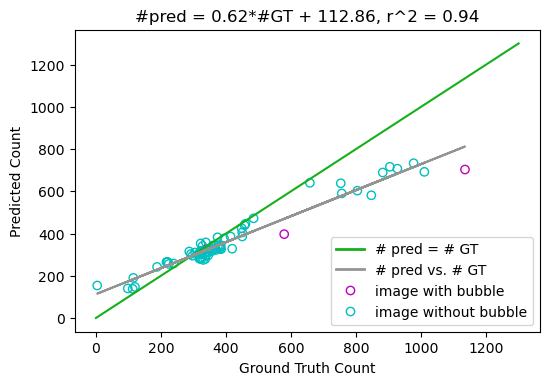

In [9]:
for kernelSize in [140, 150, 160]:
    print('kernelSize =', kernelSize)

    # set up kernel
    kernel = np.zeros((kernelSize, kernelSize), 'uint16')
    kernelCtr = kernelSize/2
    for rr in range(0, kernelSize + 1):
        for cc in range(0, kernelSize + 1):
            if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
                kernel[rr, cc] = 65535
    kernel = transform.downscale_local_mean(kernel, (ds,ds))

    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.1)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='xkcd:green')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='xkcd:gray')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:gray', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

kernelSize = 90
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


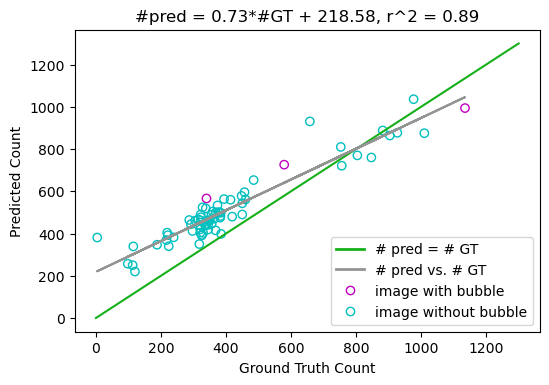

kernelSize = 100
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


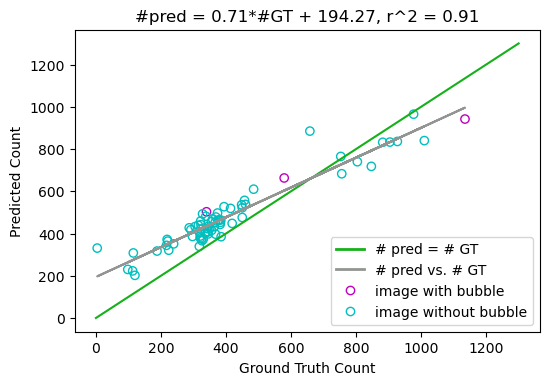

kernelSize = 120
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


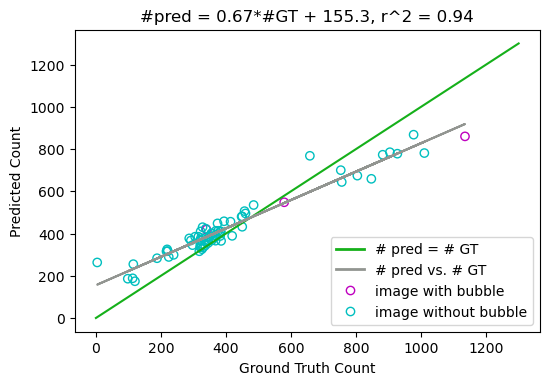

kernelSize = 130
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


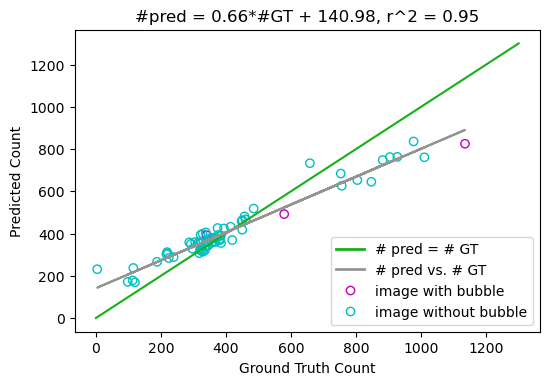

In [10]:
for kernelSize in [90, 100, 120, 130]:
    print('kernelSize =', kernelSize)

    # set up kernel
    kernel = np.zeros((kernelSize, kernelSize), 'uint16')
    kernelCtr = kernelSize/2
    for rr in range(0, kernelSize + 1):
        for cc in range(0, kernelSize + 1):
            if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
                kernel[rr, cc] = 65535
    kernel = transform.downscale_local_mean(kernel, (ds,ds))

    gt_counts, pred_counts, colors = [], [], []
    for i in range(len(names)):
        if i%10==0:
            print(i, '/', len(names))
        name = names[i]
        im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
        im = cross_correlate(im)
        df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
        blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.1)
        gt_counts.append(len(df))
        pred_counts.append(len(blobs))
        if name in bubble_image_names:
            colors.append('m')
        else:
            colors.append('c')

    plt.figure(figsize=(6,4), dpi=100)
    plt.scatter(gt_counts, pred_counts, facecolor='None', edgecolor=colors)
    plt.plot([0, 1300], [0, 1300], color='xkcd:green')
    plt.xlabel('Ground Truth Count')
    plt.ylabel('Predicted Count')

    slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
    plt.plot(gt_counts, intercept + [slope*x for x in gt_counts], color='xkcd:gray')
    plt.title('#pred = %s*#GT + %s, r^2 = %s' % (str(round(slope,2)), str(round(intercept,2)), str(round(r_value**2,2))))

    handle_list = []
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=2, label='# pred = # GT'))
    handle_list.append(Line2D([0],[0], marker=None, color='xkcd:gray', lw=2, label='# pred vs. # GT'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='m', label='image with bubble'))
    handle_list.append(Line2D([0],[0], marker='o', color='None',
                              markerfacecolor='None', markeredgecolor='c', label='image without bubble'))
    plt.legend(handles=handle_list, loc='lower right', fontsize=10)

    plt.show()

# Toggle discRadius and kernelSize

In [37]:
data = pd.DataFrame(columns=['discRadius', 'kernelSize', 'slope', 'intercept', 'r_2'])
for discRadius in [2, 3, 4]:
    for kernelSize in [120, 130, 140]:
        print('discRadius =', discRadius)
        print('kernelSize =', kernelSize)

        # set up kernel
        kernel = np.zeros((kernelSize, kernelSize), 'uint16')
        kernelCtr = kernelSize/2
        for rr in range(0, kernelSize + 1):
            for cc in range(0, kernelSize + 1):
                if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
                    kernel[rr, cc] = 65535
        kernel = transform.downscale_local_mean(kernel, (ds,ds))

        gt_counts, pred_counts, colors = [], [], []
        for i in range(len(names)):
            if i%10==0:
                print(i, '/', len(names))
            name = names[i]
            im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
            im = cross_correlate(im)
            df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
            blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.1)
            gt_counts.append(len(df))
            pred_counts.append(len(blobs))

        slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
        
        row = pd.DataFrame({
            'discRadius':[discRadius],
            'kernelSize':[kernelSize],
            'slope':[slope],
            'intercept':[intercept],
            'r_2':[r_value**2]
        })
        data = data.append(row)

discRadius = 2
kernelSize = 120
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 2
kernelSize = 130
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 2
kernelSize = 140
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 3
kernelSize = 120
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 3
kernelSize = 130
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 3
kernelSize = 140
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 4
kernelSize = 120
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 4
kernelSize = 130
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 4
kernelSize = 140
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


In [38]:
data

,discRadius,kernelSize,slope,intercept,r_2
0,2,120,0.609481,91.365980,0.943792
0,2,130,0.548911,98.673356,0.926958
0,2,140,0.483902,106.432505,0.905766
0,3,120,0.672441,155.297850,0.937211
0,3,130,0.660352,140.977149,0.945114
0,3,140,0.650076,127.978370,0.946947
0,4,120,0.643861,226.923715,0.902204
0,4,130,0.637724,203.865131,0.917773
0,4,140,0.645147,178.294330,0.932246


In [39]:
data2 = pd.DataFrame(columns=['discRadius', 'kernelSize', 'slope', 'intercept', 'r_2'])
for discRadius in [2, 3, 4]:
    for kernelSize in [150]:
        print('discRadius =', discRadius)
        print('kernelSize =', kernelSize)

        # set up kernel
        kernel = np.zeros((kernelSize, kernelSize), 'uint16')
        kernelCtr = kernelSize/2
        for rr in range(0, kernelSize + 1):
            for cc in range(0, kernelSize + 1):
                if  math.sqrt((rr - kernelCtr)**2 + (cc - kernelCtr)**2) < discRadius:
                    kernel[rr, cc] = 65535
        kernel = transform.downscale_local_mean(kernel, (ds,ds))

        gt_counts, pred_counts, colors = [], [], []
        for i in range(len(names)):
            if i%10==0:
                print(i, '/', len(names))
            name = names[i]
            im = imread('raw_images_cropped/image-cropped-%s.tif' % name)
            im = cross_correlate(im)
            df = pd.read_csv('./all_test_gt_complete/image-cropped-rescaled-%s.csv' % name)
            blobs = blob_dog(im, min_sigma=5, max_sigma=15, threshold=0.1)
            gt_counts.append(len(df))
            pred_counts.append(len(blobs))

        slope, intercept, r_value, p_value, std_err = linregress(gt_counts, pred_counts)
        
        row = pd.DataFrame({
            'discRadius':[discRadius],
            'kernelSize':[kernelSize],
            'slope':[slope],
            'intercept':[intercept],
            'r_2':[r_value**2]
        })
        data2 = data2.append(row)

discRadius = 2
kernelSize = 150
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 3
kernelSize = 150
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71
discRadius = 4
kernelSize = 150
0 / 71
10 / 71
20 / 71
30 / 71
40 / 71
50 / 71
60 / 71
70 / 71


In [40]:
data2

,discRadius,kernelSize,slope,intercept,r_2
0,2,150,0.424699,113.556064,0.876621
0,3,150,0.631571,120.559170,0.946231
0,4,150,0.640446,162.488057,0.940120


In [43]:
data3 = data.append(data2)

In [44]:
data3

,discRadius,kernelSize,slope,intercept,r_2
0,2,120,0.609481,91.365980,0.943792
0,2,130,0.548911,98.673356,0.926958
0,2,140,0.483902,106.432505,0.905766
0,3,120,0.672441,155.297850,0.937211
0,3,130,0.660352,140.977149,0.945114
0,3,140,0.650076,127.978370,0.946947
0,4,120,0.643861,226.923715,0.902204
0,4,130,0.637724,203.865131,0.917773
0,4,140,0.645147,178.294330,0.932246
0,2,150,0.424699,113.556064,0.876621


# Results of toggling discRadius and kernelSize

In [45]:
data3.sort_values(by=['discRadius', 'kernelSize'])

,discRadius,kernelSize,slope,intercept,r_2
0,2,120,0.609481,91.365980,0.943792
0,2,130,0.548911,98.673356,0.926958
0,2,140,0.483902,106.432505,0.905766
0,2,150,0.424699,113.556064,0.876621
0,3,120,0.672441,155.297850,0.937211
0,3,130,0.660352,140.977149,0.945114
0,3,140,0.650076,127.978370,0.946947
0,3,150,0.631571,120.559170,0.946231
0,4,120,0.643861,226.923715,0.902204
0,4,130,0.637724,203.865131,0.917773


discRadius = 3, kernelSize = 140 yields the best r^2 value and the third best slope.